# Import the analysis and visualization libraries

In [1]:
# Import the libraries for analysis and visualization

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
PATH = '02 Data'

# Q.n.1. Import the dataframe

In [4]:
# Import the merged dataframe 

Instacart_merged = pd.read_pickle(os.path.join(PATH, 'Prepared Data', 'df_instacart.pkl'))


In [5]:
Instacart_merged.head()

,user_id,First Name,Last Name,Gender,STATE,Age(yrs),Date_of_join,No_of_dependants,Family_status,Income($),order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_category_loc,Busiest day,Busiest days and Slowest days,Busiest_period_of_day,max_order,Loyalty_flag_loc,user_average_price,spending_flag,order_median,order_frequency_flag
0,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,5.0,1.0,9.0,30.0,196.0,2.0,0.0,both,Soda,77.0,7.0,9.0,Mid_range product,Regularly busy,Second busiest day,Average orders,9.0,New customer,7.483644,Low spender,19.0,Regular customer
1,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,7.0,5.0,15.0,11.0,196.0,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid_range product,Regularly busy,Regularly busy,Average orders,9.0,New customer,6.085714,Low spender,19.0,Regular customer
2,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,8.0,1.0,15.0,10.0,196.0,2.0,1.0,both,Soda,77.0,7.0,9.0,Mid_range product,Regularly busy,Second busiest day,Average orders,9.0,New customer,11.070000,High spender,19.0,Regular customer
3,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547.0,2.0,2.0,9.0,14.0,38928.0,1.0,0.0,both,0% Greek Strained Yogurt,120.0,16.0,12.6,Mid_range product,Regularly busy,Regularly busy,Average orders,9.0,New customer,NaN,NaN,19.0,Regular customer
4,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893.0,3.0,3.0,11.0,30.0,38928.0,1.0,1.0,both,0% Greek Strained Yogurt,120.0,16.0,12.6,Mid_range product,Regularly busy,Second slowest day,Average orders,9.0,New customer,NaN,NaN,19.0,Regular customer


# Q.n.2.Consider any security implications that might exist for this new data

I can address some personally identifiable information (PII) in the new dataframe, these are  'First Name', 'Last Name','Gender', 'Age','No_of_dependants', 'Family_status'and 'income'.



# Q.n.3.

## Create a 'Region' column

In [6]:
# Create 'Region'column based on the “State” column with for-loop function
result = []

for value in Instacart_merged['STATE']:
    
    if value in ('Maine', 'New Hampshire','Vermont', 'Massachusetts','Rhode Island', 'Connecticut', 'New York', 'Pennsylvania',
        'New Jersey'):
        result.append('Northeast')
        
    elif value in  ('Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska','Kansas',
        'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
            
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina',
        'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 
        'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
            
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah','Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington',
        'Oregon', 'California', 'Hawaii'):
        result.append('West')
            
    else :
        result.append ('Others')

In [7]:
# create 'region'column  within Instacart_merged dataframe and set it equal to result

Instacart_merged['Region']= result

In [8]:
# creat a summary column for the 'Region'(frequency)

Instacart_merged['Region'].value_counts(dropna = False)

Region
South        10871134
West          8353486
Midwest       7652795
Northeast     5765035
Name: count, dtype: int64

In [9]:
Instacart_merged['department_id']

0            7.0
1            7.0
2            7.0
3           16.0
4           16.0
            ... 
32642445    19.0
32642446    19.0
32642447     7.0
32642448    19.0
32642449    19.0
Name: department_id, Length: 32642450, dtype: float64

In [10]:
Instacart_merged.head()

,user_id,First Name,Last Name,Gender,STATE,Age(yrs),Date_of_join,No_of_dependants,Family_status,Income($),order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_category_loc,Busiest day,Busiest days and Slowest days,Busiest_period_of_day,max_order,Loyalty_flag_loc,user_average_price,spending_flag,order_median,order_frequency_flag,Region
0,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867.0,5.0,1.0,9.0,30.0,196.0,2.0,0.0,both,Soda,77.0,7.0,9.0,Mid_range product,Regularly busy,Second busiest day,Average orders,9.0,New customer,7.483644,Low spender,19.0,Regular customer,Midwest
1,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508.0,7.0,5.0,15.0,11.0,196.0,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid_range product,Regularly busy,Regularly busy,Average orders,9.0,New customer,6.085714,Low spender,19.0,Regular customer,Midwest
2,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584.0,8.0,1.0,15.0,10.0,196.0,2.0,1.0,both,Soda,77.0,7.0,9.0,Mid_range product,Regularly busy,Second busiest day,Average orders,9.0,New customer,11.070000,High spender,19.0,Regular customer,Midwest
3,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547.0,2.0,2.0,9.0,14.0,38928.0,1.0,0.0,both,0% Greek Strained Yogurt,120.0,16.0,12.6,Mid_range product,Regularly busy,Regularly busy,Average orders,9.0,New customer,NaN,NaN,19.0,Regular customer,Midwest
4,26711.0,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893.0,3.0,3.0,11.0,30.0,38928.0,1.0,1.0,both,0% Greek Strained Yogurt,120.0,16.0,12.6,Mid_range product,Regularly busy,Second slowest day,Average orders,9.0,New customer,NaN,NaN,19.0,Regular customer,Midwest


## Determine whether there’s a difference in spending habits between the different U.S. regions

In [88]:
# crossing the variable 

cross_tab = pd.crosstab(Instacart_merged['Region'], Instacart_merged['spending_flag'], dropna = False )

In [89]:
#  Convert the cross-tabulation to a DataFrame

df_result = pd.DataFrame(cross_tab)


In [90]:
df_result.columns

Index(['High spender', 'Low spender'], dtype='object', name='spending_flag')

In [91]:
# craete a summary 
df_result

spending_flag,High spender,Low spender
Region,,
Midwest,1273,47408
Northeast,917,35136
South,1793,66226
West,1392,52064


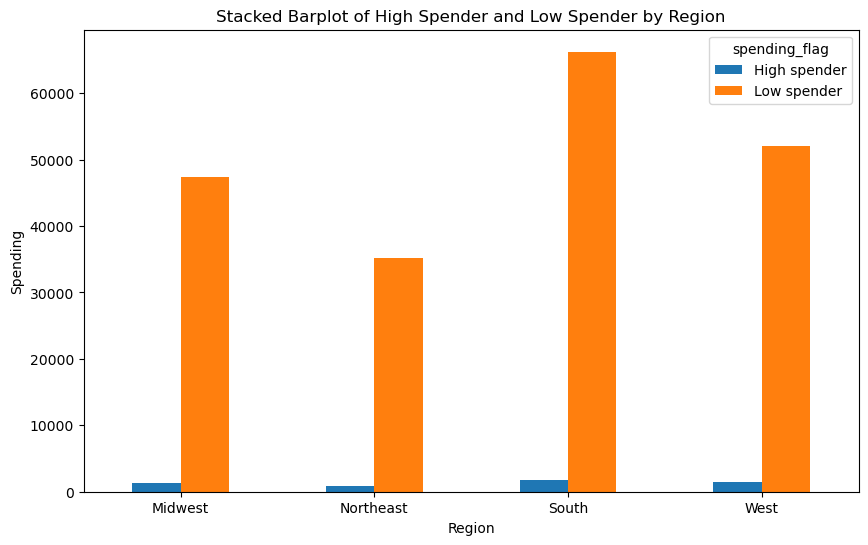

In [120]:
# a stacked bar for spender across the region

stacked_bar = df_result.plot(kind='bar', stacked=False, figsize=(10, 6))

# Rotate x-axis labels to be horizontal
plt.xticks(rotation=0)
# set the title, x lebel and y lebel
plt.title('Stacked Barplot of High Spender and Low Spender by Region')
plt.xlabel('Region')
plt.ylabel('Spending')
plt.legend(title='spending_flag', loc='upper right')
plt.show()

In [121]:
# save the visualization

stacked_bar.figure.savefig(os.path.join('04 Analysis','Visualization', 'stacked_bar_spending_region.png'))

# Q.n.4.

In [20]:
# create  a flag  for low-activity customer
#Instacart_merged_unique = Instacart_merged.drop_duplicates(subset=['max_order','user_id']) 

Instacart_merged_unique.loc[Instacart_merged_unique['max_order']< 5, 'exclusion_flag'] = 'low_activity_customer'

/var/folders/c6/l683wjhx5lsb9xd7t_fkht780000gn/T/ipykernel_2788/2476833251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Instacart_merged_unique.loc[Instacart_merged_unique['max_order']< 5, 'exclusion_flag'] = 'low_activity_customer'


In [21]:
# flag for active_customer

Instacart_merged_unique.loc[Instacart_merged_unique['max_order']>= 5, 'exclusion_flag'] = 'activ_customer'

In [22]:
# create a summary of 'exclusion_flag'

Instacart_merged_unique['exclusion_flag'].value_counts(dropna= False)

exclusion_flag
activ_customer           182223
low_activity_customer     23986
Name: count, dtype: int64

In [23]:
len(Instacart_merged.user_id.unique())

206209

In [24]:
Instacart_merged.shape

(32642450, 34)

In [25]:
# exclude the low_activity_customer

filtered_Instacart_merged_unique = Instacart_merged_unique[Instacart_merged_unique['max_order'] >= 5]

In [26]:
filtered_Instacart_merged_unique['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
activ_customer    182223
Name: count, dtype: int64

In [27]:
# export the sample-exclude low_activity_customer

filtered_Instacart_merged_unique.to_pickle(os.path.join('04 Analysis', 'Test files', 'filtered_Instacart_merged_unique.pkl'))

# Q.n.5.

In [74]:
# Import the department_id dataframe

department = pd.read_csv(os.path.join(PATH, 'Original Data', 'departments.csv'))

In [108]:
# Transposing data

department.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


## set the customer profile

In [30]:
# create  a flag  for Young Professionals

Instacart_merged.loc[
    (Instacart_merged['Age(yrs)'] >= 22) & (Instacart_merged['Age(yrs)'] <= 30)&
    (Instacart_merged['Income($)'] >= 40000) & (Instacart_merged['Income($)'] <= 80000) &
    (Instacart_merged['department_id'].isin([1, 3, 5,7, 9, 11,15, 16])) & 
    (Instacart_merged['No_of_dependants'] == 0),
    'customer_profiling'
] = 'young professionals'

In [31]:
# create  a flag  for single adult

Instacart_merged.loc[
    (Instacart_merged['Age(yrs)'] >= 25) & (Instacart_merged['Age(yrs)'] <= 40)&
    (Instacart_merged['Income($)'] >= 40000) & (Instacart_merged['Income($)'] <= 70000) &
    (Instacart_merged['department_id'].isin([1, 3, 7, 8, 9, 11, 15, 16])) & 
    (Instacart_merged['No_of_dependants'] == 0),
    'customer_profiling'
] = 'single adult'

In [32]:
# create  a flag  for young parents

Instacart_merged.loc[
     (Instacart_merged['Age(yrs)'] >= 25) & (Instacart_merged['Age(yrs)'] <= 35)&
    (Instacart_merged['Income($)'] >= 40000) & (Instacart_merged['Income($)'] <= 70000) &
    (Instacart_merged['department_id'].isin([1,2,3,7, 9, 10, 11,17,18])) & 
    (Instacart_merged['No_of_dependants'] >= 1) & (Instacart_merged['No_of_dependants'] <= 2),
    'customer_profiling'
] = 'young parents'

In [33]:
# create a summary of 'customer_profiling'

customer_profiling = Instacart_merged['customer_profiling'].value_counts(dropna= False)

# Q.n.6. Create an appropriate visualization to show the distribution of profiles

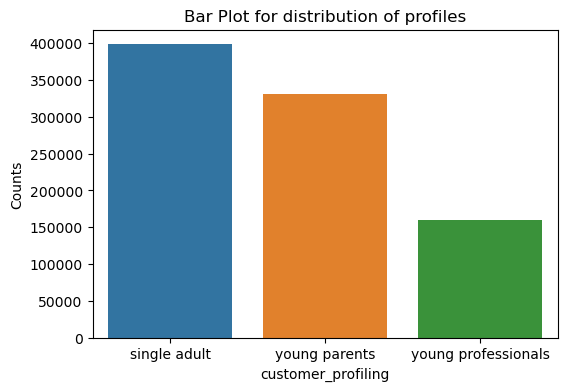

In [122]:
# A bar chart for distribution of customer profile

bar_chart = plt.figure(figsize=(6, 4))
sns.barplot(x=customer_profiling.index, y=customer_profiling.values)
plt.title('Bar Plot for distribution of profiles')
plt.xlabel('customer_profiling')
plt.ylabel('Counts')
plt.show()

In [124]:
# save the visualization

bar_chart.figure.savefig(os.path.join('04 Analysis','Visualization', 'bar_chart_customer_profiling.png'))

/var/folders/c6/l683wjhx5lsb9xd7t_fkht780000gn/T/ipykernel_2788/2947497659.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_profiling', y='user_average_price', data = Instacart_merged, ci= None)


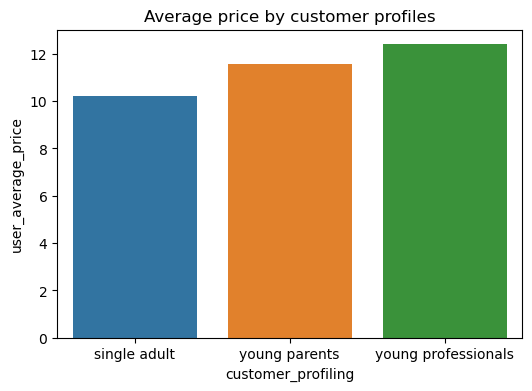

In [133]:
# create a bar chart for spending habits of customers

bar_chart = plt.figure(figsize=(6, 4))
sns.barplot(x='customer_profiling', y='user_average_price', data = Instacart_merged, ci= None)
plt.title('Average price by customer profiles')
plt.xlabel('customer_profiling')
plt.ylabel('user_average_price')
plt.show()

In [135]:
# export the viz.
bar_chart.figure.savefig(os.path.join('04 Analysis','Visualization', 'bar_chart_customer_profiling_prices.png'))

# Q.n.7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [35]:
Instacart_merged.columns

Index(['user_id', 'First Name', 'Last Name', 'Gender', 'STATE', 'Age(yrs)',
       'Date_of_join', 'No_of_dependants', 'Family_status', 'Income($)',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_category_loc', 'Busiest day',
       'Busiest days and Slowest days', 'Busiest_period_of_day', 'max_order',
       'Loyalty_flag_loc', 'user_average_price', 'spending_flag',
       'order_median', 'order_frequency_flag', 'Region', 'customer_profiling'],
      dtype='object')

In [51]:
# Group by customer_profiling and agg 'order_id'by count and user_average_price by sum 

customer_profile_counts = Instacart_merged.groupby('customer_profiling')['order_id'].count().reset_index(name='order_count')
customer_profile_sums = Instacart_merged.groupby('customer_profiling')['user_average_price'].sum().reset_index(name='total_expenditure')


In [52]:
# Merge the two DataFrames on 'customer_profiling'

merged_profiles = pd.merge(customer_profile_counts, customer_profile_sums, on='customer_profiling')


In [66]:
# Aggregate mean, max, and min on the merged DataFrame

customer_profile_aggregated = merged_profiles.agg({
    'order_count': ['mean', 'max', 'min'],
    'total_expenditure': ['mean', 'max', 'min'],
})

In [67]:
print(customer_profile_aggregated)

        order_count  total_expenditure
mean  296025.666667       11277.298143
max   398375.000000       17123.468851
min   159099.000000        4045.129205


# Q.n.8. Compare your customer profiles with regions and departments

In [82]:
customer_profile_region_department = Instacart_merged.groupby(['customer_profiling', 'Region', 'department_id']).size().reset_index(name='customer_count')

/var/folders/c6/l683wjhx5lsb9xd7t_fkht780000gn/T/ipykernel_2788/789330.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='customer_count', hue='department_id', data=customer_profile_region_department, ci = None)


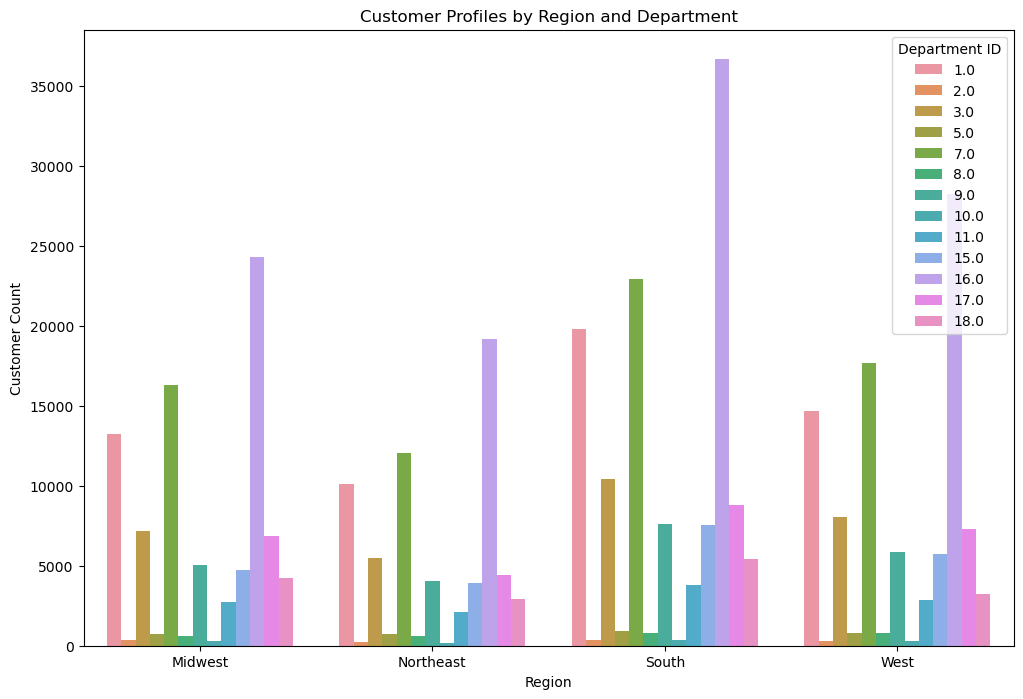

In [95]:
Stacked_bar = plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='customer_count', hue='department_id', data=customer_profile_region_department, ci = None)
plt.title('Customer Profiles by Region and Department')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.legend(title='Department ID', loc='upper right')
plt.show()

In [79]:
data_dict = department.to_dict ('index')

In [102]:
data_dict

{0: {'department_id': 'department',
  '1': 'frozen',
  '2': 'other',
  '3': 'bakery',
  '4': 'produce',
  '5': 'alcohol',
  '6': 'international',
  '7': 'beverages',
  '8': 'pets',
  '9': 'dry goods pasta',
  '10': 'bulk',
  '11': 'personal care',
  '12': 'meat seafood',
  '13': 'pantry',
  '14': 'breakfast',
  '15': 'canned goods',
  '16': 'dairy eggs',
  '17': 'household',
  '18': 'babies',
  '19': 'snacks',
  '20': 'deli',
  '21': 'missing'}}

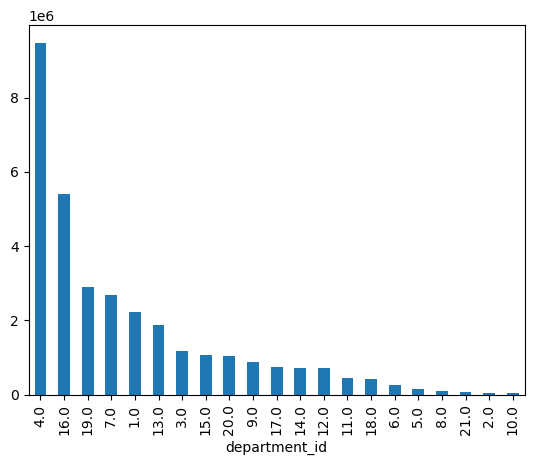

In [112]:
# create a bar plot to check the most popular department

bar_plot = Instacart_merged['department_id'].value_counts().plot.bar()


In [113]:
# save the visualization

bar_plot.figure.savefig(os.path.join('04 Analysis','Visualization', 'bar_plot_popular_dept.png'))

# Q.n.9. Produce suitable charts to illustrate your results and export them in your project folder.


In [99]:
# export the viz, Q.n.8.

Stacked_bar.figure.savefig(os.path.join('04 Analysis', 'Visualization', 'stacked_compare_customer_profile.png'))